# **01.** K-평균 알고리즘 이해

- **K-평균** : 군집 중심점(centroid)을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법
- 군집 중심점은 선택된 포인트의 평균 지점으로 이동 → 이동된 중심점에서 다시 가까운 포인트를 선택 → 다시 중심점을 평균 지점으로 이동 ⇒ 이 프로세스를 반복적으로 수행
- 모든 데이터 포인트에서 더 이상 중심점의 이동이 없을 경우에 반복을 멈추고 해당 중심점에 속하는 데이터 포인트들을 군집화하는 기법

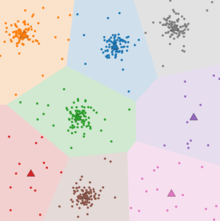

- K-평균 동작 방법
  1. 군집화의 기준이 되는 중심을 구성하려는 군집화 개수만큼 임의의 위치에 가져다 놓는다.
  2. 각 데이터는 가장 가까운 곳에 위치한 중심점에 소속된다.
  3. 이렇게 소속이 결정되면 군집 중심점을 소속된 데이터의 평균 중심으로 이동한다.
  4. 중심점이 이동했기 때문에, 각 데이터는 기존에 속한 중심점보다 더 가까운 중심점이 있다면 해당 중심점으로 다시 소속을 변경한다.
  5. 다시 중심을 소속된 데이터의 평균 중심으로 이동한다.
  6. 중심점을 이동했는데 데이터의 중심점 소속 변경이 없으면 군집화를 종료한다. 그렇지 않다면 다시 4번 과정을 거쳐서 소속을 변경하고 이 과정을 반복한다.

- K-평균의 장점
  - 일반적인 군집화에서 가장 많이 활용되는 알고리즘
  - 쉽고 간결한 알고리즘

- K-평균의 단점
  - 거리 기반 알고리즘으로 속송의 개수가 매우 많을 경우 군집화 정확도가 떨어짐 ⇒ PCA로 차원 감소 적용해야함
  - 반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 매우 느려짐
  - 몇 개의 군집(cluster)을 선택해야 할 지 가이드하기 어려움



---



**사이킷런 KMeans 클래스 소개**

```
class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
                             precompute_distances='auto', verbose=0, random_state=None, copy_x=True,
                             n_jobs=1, algorithm='auto')
```
- n_clusters : 가장 중요한 파라미터로, 군집화할 개수(군집 중심점의 개수)를 의미
- init : 초기에 군집 중심점의 좌표를 설정할 방식 ⇒ 일반적으로 k-means++방식으로 최초 설정
- max_iter : 최대 반복 횟수 ⇒ 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료


- 이렇게 수행된 KMeans 객체는 군집화 수행이 완료돼 군집화와 관련된 주요 속성을 알 수 있음
  - labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
  - cluster_centers_ : 각 군집 중심점 좌표([군집 개수, 피처 개수])



---



**K-평균을 이용한 붓꽃 데이터 세트 군집화**

- 필요한 모듈과 데이터 세트 로드

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


- 붓꽃 데이터 세트를 3개 그룹으로 군집화

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

- 각 데이터가 어떤 중심에 속하는 지 알아보기

In [ ]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


- 실제 붓꽃 품종 분류 값과 얼마나 차이가 나는지 ⇒ 군집화가 효과적으로 됐는지 확인

In [ ]:
irisDF['target'] = iris.target
irisDF['cluster']=kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


- 결과 :
  - 분류 타깃이 0값인 데이터 : 1번 군집으로 모두 잘 Grouping !
  - 분류 타깃이 1값인 데이터 : 2번 군집으로 2개 + 0번 군집으로 나머지 48개 Grouping !
  - 분류 타깃이 2값인 데이터 : 0번 군집으로 14개 + 2번 군집으로 나머지 36개 Grouping !
  

- 붓꽃 데이터 세트의 군집화를 시각화 : 2차원 평면상에서 개별 데이터의 군집화를 시각적으로 표현하기 위해, 속성 4개를 2개로 **차원 축소** !!

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


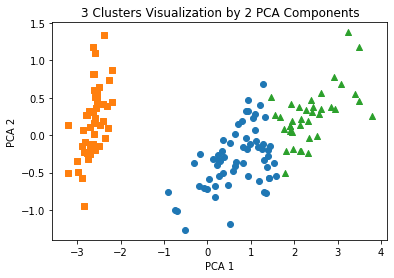

In [ ]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

- 결과 :
  - Cluster 1을 나타내는 square은 명확히 다른 군집과 잘 분리되어있음
  - Cluster 0과 2의 경우 속성의 위치 자체가 명확히 분리되기 어려운 부분이 존재함



---



**군집화 알고리즘 테스트를 위한 데이터 생성**

- 대표적인 군집화용 데이터 생성기 : `make_blobs()` , `make_classification()`
- 두 API는 비슷하게 여러 개의 클래스에 해당하는 데이터 세트를 만드는데, 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터를 생성할 수 있음
  - `make_blobs()` : 개별 군집의 중심점과 표준 편차 제어 기능이 추가되어 있음
  - `make_classification()` : 노이즈를 포함한 데이터를 만드는 데 유용하게 사용할 수 있음
  - 둘 다 분류 용도로도 테스트 데이터 생성 가능
- 이 외에 `make_circle()`, `make_moon()` API는 중심 기반의 군집화로 해결하기 어려운 데이터 세트를 만드는 데 사용

- `make_blobs()`를 호출하면 피처 데이터 세트와 타깃 데이터 세트가 튜플(Tuple)로 반환됨
- `make_blobs()`의 호출 파라미터
  - n_samples : 생성할 총 데이터의 개수 ( default : 100 )
  - n_features : 데이터의 피처 개수 ( 시각화를 목표로 할 경우 2개로 설정 )
  - centers : int 값 ⇒ 군집의 개수 / ndarray ⇒ 개별 군집 중심점의 좌표
  - cluster_std : 생성될 군집 데이터의 표준 편차

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [ ]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


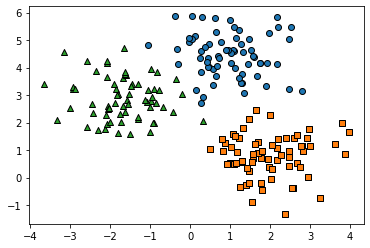

In [ ]:
target_list = np.unique(y)
# 각 타깃별 산점도의 마커 값.
markers=['o', 's', '^', 'P', 'D', 'H', 'x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성.
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k',
                marker=markers[target] )

plt.show()

- 위와 같이 만들어진 데이터 세트에 KMeans 군집화 수행 & 시각화

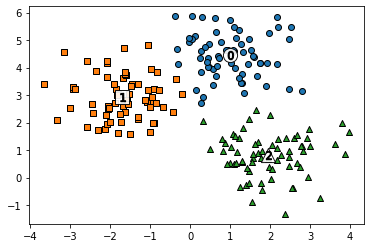

In [ ]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행.
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
                marker=markers[label] )

    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
                marker='$%d$' % label)

plt.show()

- 결과 확인 : 거의 대부분 잘 매핑

In [ ]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


- `make_blobs()`은 cluster_std 파라미터로 데이터의 분포도를 조절
  - 작을수록 군집 중심에 데이터가 모여 있음
  - 클수록 데이터가 퍼져 있음

# **02.** 군집 평가(Cluster Evaluation)

- 군집화는 분류(Classification)와 유사해 보일 수 있으나 성격이 많이 다름
  - 데이터 내에 숨어 있는 별도의 그룹을 찾아서 의미를 부여하거나
  - 동일한 분류 값에 속하더라도 그 안에서 더 세분화된 군집화를 추구하거나
  - 서로 다른 분류 값의 데이터도 더 넓은 군집화 레벨화 등의 영역을 가지고 있음

- 군집화는 비지도학습이기 때문에 정확하게 성능을 평가하기는 어렵지만, 대표적인 방법으로 **실루엣 분석**을 이용



---



**실루엣 분석의 개요**

- **실루엣 분석** : 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냄
- 효율적으로 잘 분리됨 = 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있음
- 군집화가 잘 될수록 개별 군집은 비슷한 정도의 여유공간을 가지고 떨어져 있을 것

- **실루엣 계수**(silhouette coefficient) : 개별 데이터가 가지는 군집화 지표 ⇒ 해당 데이터가 같은 군집 내의 데이터와 **얼마나 가깝게 군집화**돼 있고, 다른 군집에 있는 데이터와는 **얼마나 멀리 분리**돼 있는지를 나타냄
  > $s(i) = \frac{(b(i) - a(i))}{max(a(i),b(i))}$  

  > 여기서,  
  $a(i)$는 $i$번째 데이터에서 자신이 속한 클러스터 내의 다른 데이터 포인트들의 평균 거리  
  $b(i)$는 $i$번째 데이터에서 가장 가까운 타 클러스터 내의 다른 데이터 포인트들의 평균 거리

- 실루엣 계수는 -1 ~ 1 사이의 값을 가짐
  - 1로 가까워질수록 근처의 군집과 더 멀리 떨어짐
  - 0에 가까워질수록 근처의 군집과 가까워짐
  - $-$값은 아예 다른 군집에 데이터 포인트가 할당됨

- 실루엣 분석을 위한 사이킷런 메서드
  - `sklearn.metrics.silhouette_samples(X, labels, metric='euclidean', **kwds)` : 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 **각 데이터 포인트의 실루엣 계수**를 계산해 반환
  - `sklearn.metrics.silhouette_score(X, labels, metric='euclidean', sample_size=None, **kwds)` : 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 **전체 데이터의 실루엣 계수 값을 평균**해 반환

- 좋은 군집화가 되기 위한 조건
  1. 전체 실루엣 계수의 평균값(사이킷런의 silhouette_score()값)은 0 ~ 1 사이의 값을 가지며, 1에 가까울수록 좋음
  2. 개별 군집의 평균값의 편차가 크지 않아야 함



---



**붓꽃 데이터 세트를 이용한 군집 평가**

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(irisDF)

irisDF['cluster'] = kmeans.labels_

# iris 의 모든 개별 데이터에 실루엣 계수값을 구함.
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함.
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

irisDF.head(3)

silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


- 군집 칼럼별로 group by하여 silhouette_coeff 칼럼의 평균값 구하기

In [ ]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64



---



**군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법**

- 개별 군집별로 적당히 분리된 거리를 유지하면서도 군집 내의 데이터가 서로 뭉쳐 있는 경우에 K-평균의 적절한 군집 개수가 설정됐다고 판단할 수 있음
- 좋은 예제 ; http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

- 평균 실루엣 계수로 군집 개수를 최적화하는 방법
  1. 군집 개수 = 2 ⇒ 평균 실루엣 계수 값 = 0.704
  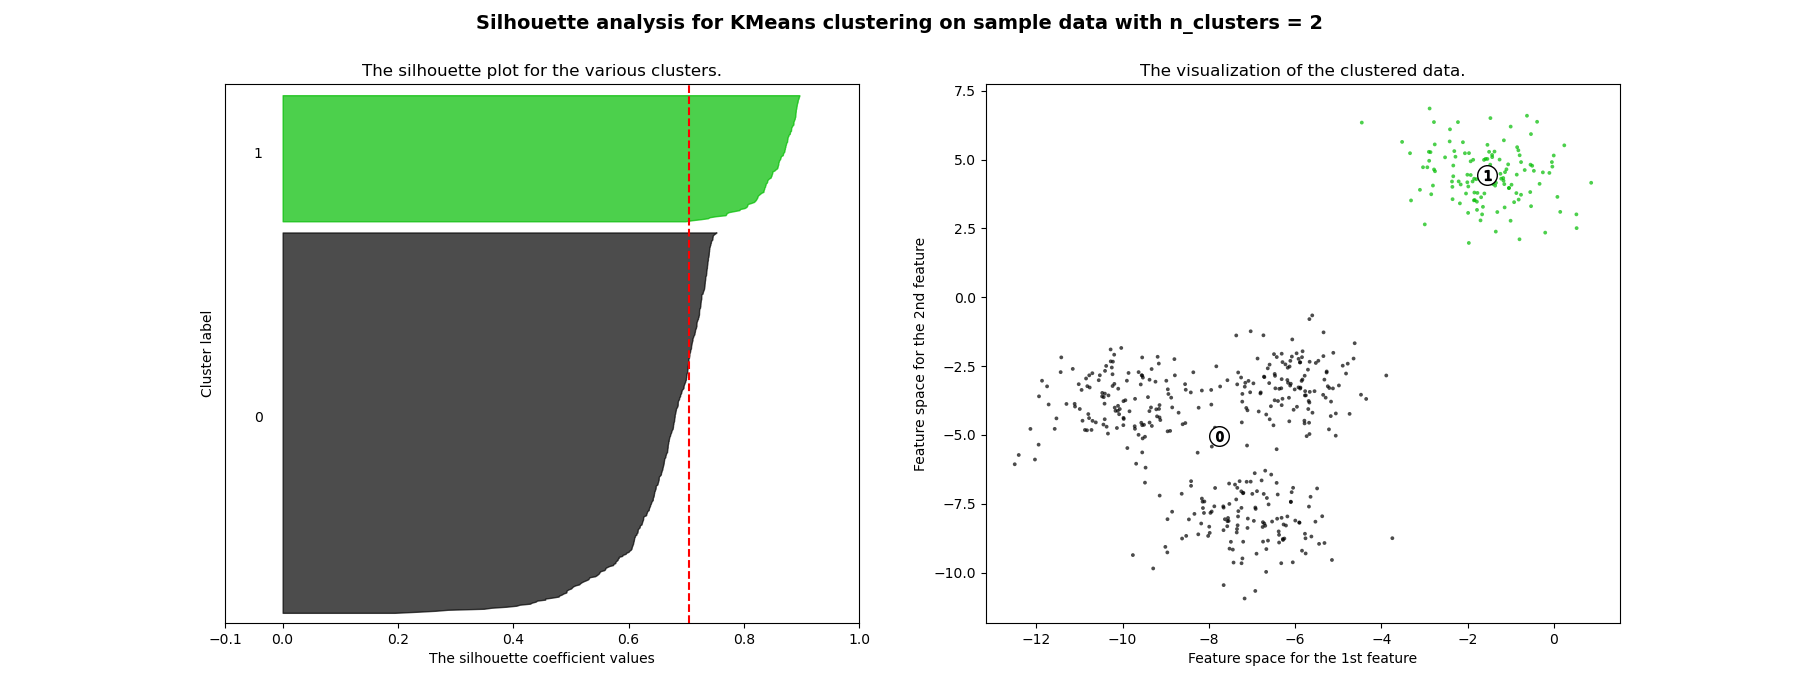
  2. 군집 개수 = 3 ⇒ 평균 실루엣 계수 값 = 0.588
  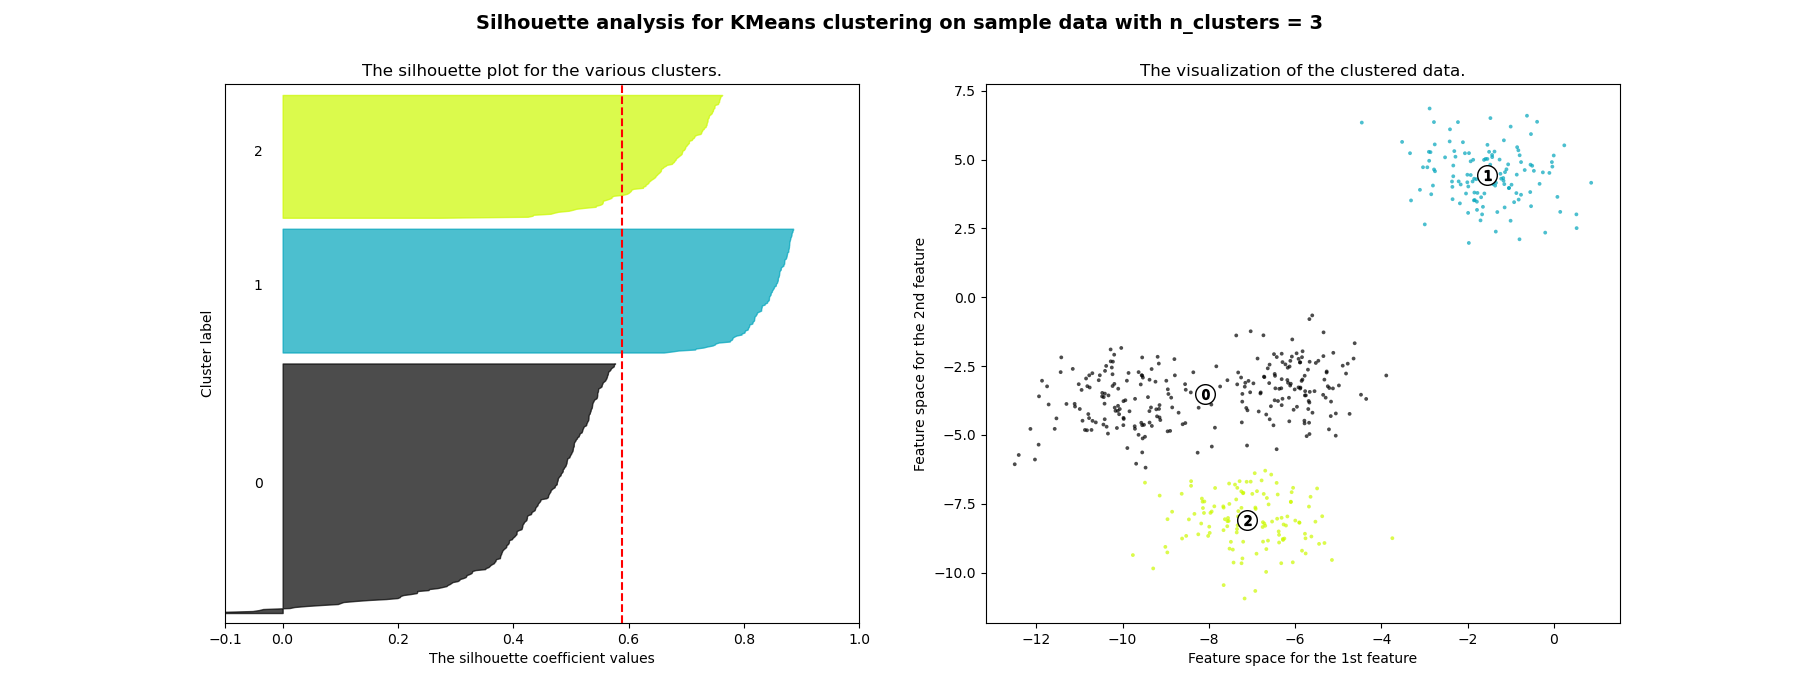
  3. 군집 개수 = 4 ⇒ 평균 실루엣 계수 값 = 0.65
  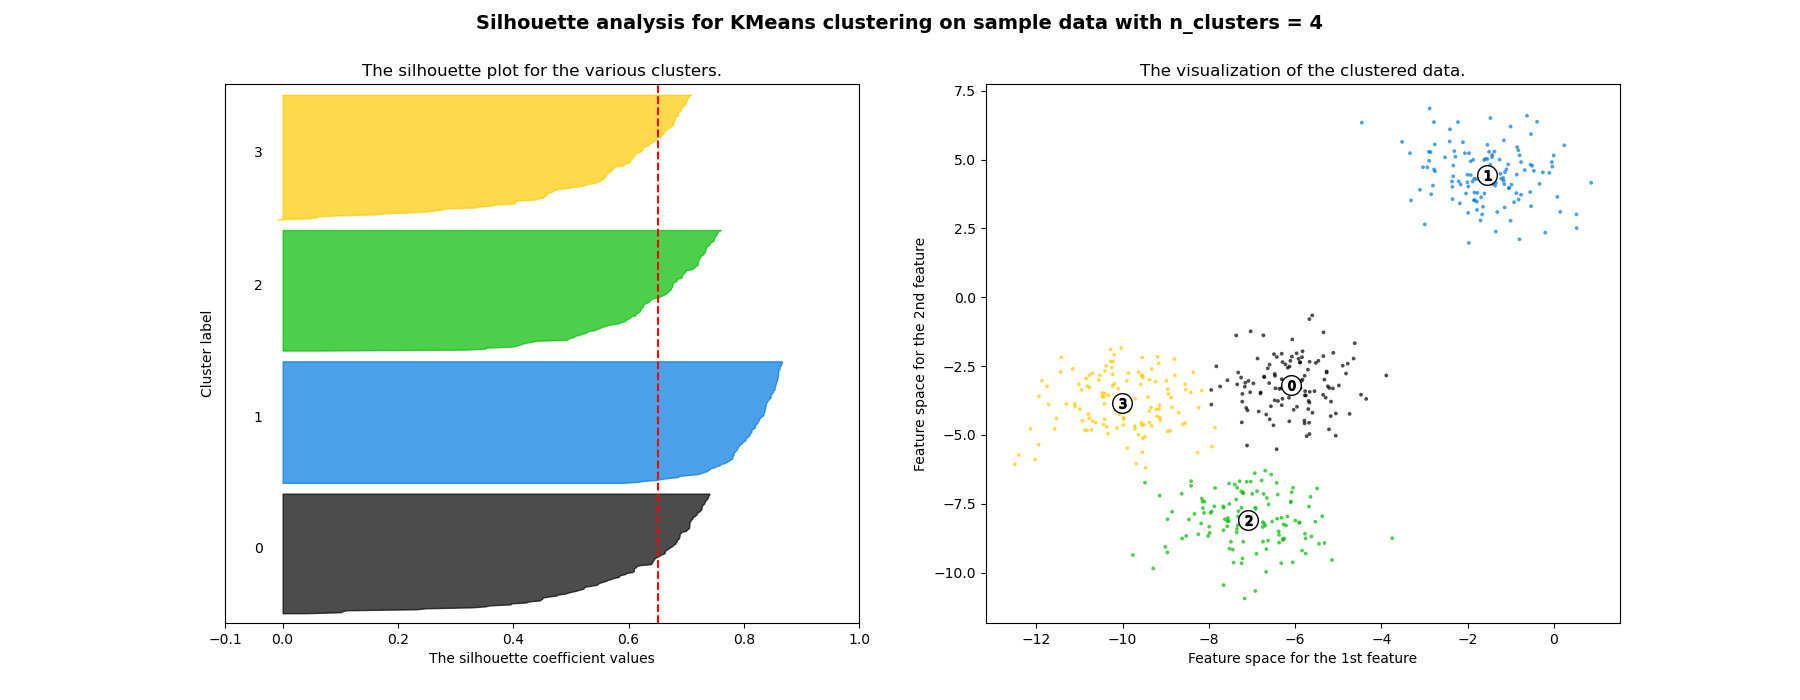

- 왼쪽 그림의 군집별 평균 실루엣 계수 값을 구하는 부분만 별도의 함수로 만들어 시각화

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

- make_blobs() 함수를 이용해 데이터 세트를 만들고 K-평균 군집화 시행 후 최적의 군집 개수 = 4개

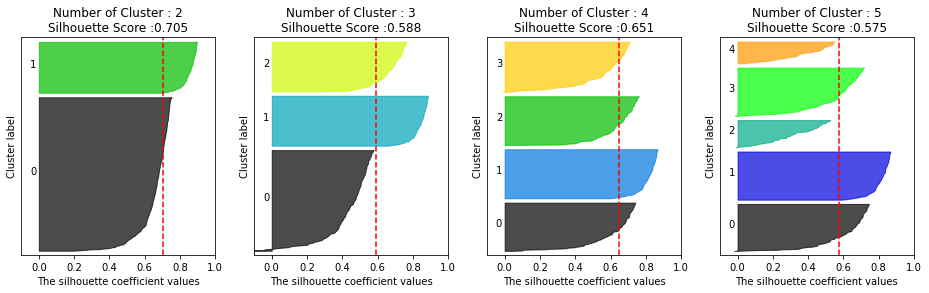

In [ ]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화
visualize_silhouette([ 2, 3, 4, 5], X)

- 붓꽃 데이터를 이용해 K-평균 수행 시 최적의 군집 개수 = 2개

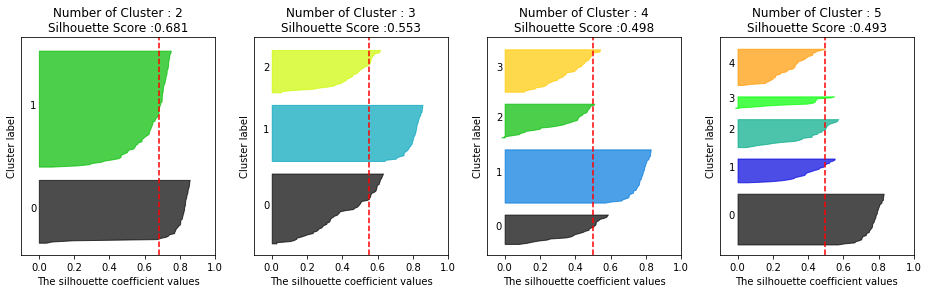

In [ ]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([ 2, 3, 4,5 ], iris.data)

# **03.** 평균 이동

**평균 이동(Mean Shift)의 개요**

- K-평균은 중심에 소속된 데이터의 평균 거리 중심으로 이동
- 평균 이동은 중심을 데이터가 모여 있는 **밀도**가 가장 높은 곳으로 이동
- 평균 이동 군집화는 데이터의 분포도를 이용해 군집 중심점을 찾음 ⇒ 이를 위해 확률 밀도 함수(probability density function)를 이용
- 가장 집중적으로 데이터가 모여있어 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정 ⇒ 일반적으로 주어진 모델의 확률 밀도 함수를 찾기 위해서 KDE(Kernel Density Estimation)를 이용

- 평균 이동 군집화 : 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해, 주변 데이터와의 거리 값을 KDE 함수 값으로 입력한 뒤, 그 반환 값을 현재 위치에서 업데이트하면서 이동하는 방식
  1. 개별 데이터의 특정 반경 내에 주변 데이터를 포함한 데이터 분포도를 KDE 기반의 Mean Shift 알고리즘으로 계산
  2. KDE로 계산된 데이터 분포도가 높은 방향으로 데이터 이동
  3. 모든 데이터를 1 ~ 2번까지 수행하면서 데이터를 이동 ⇒ 개별 데이터들이 군집 중심점으로 모임
  4. 지정된 반복(Iteration) 횟수만큼 전체 데이터에 대해서 KDE 기반으로 데이터를 이동시키면서 군집화 수행
  5. 개별 데이터들이 모인 중심점을 군집 중심점으로 설정

- KDE(Kernel Density Estimation) : 커널(Kernel)함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법
  - 확률 밀도 함수 PDF(Probability Density Function) : 확률 변수의 분포를 나타내는 함수(정규분포 함수, 감마 분포, t-분포 등)
  - KDE는 개별 관측 데이터에 커널 함수를 적용한 뒤, 이 적용 값을 모두 더한 후 개별 관측 데이터의 건수로 나눠 확률 밀도 함수를 추정 ⇒ 대표적인 가우시안 분포 함수
  > $KDE = \frac{1}{n} \displaystyle\sum_{i=1}^{n}K_h(x-x_i) = \frac{1}{nh} \displaystyle\sum_{i=1}^{n}K \left( \frac{x-x_i}{h} \right) $  
  > 여기서, $K$는 커널 함수, $x$는 확률 변숫값, $x_i$는 관측값, $h$는 대역폭(bandwidth)

  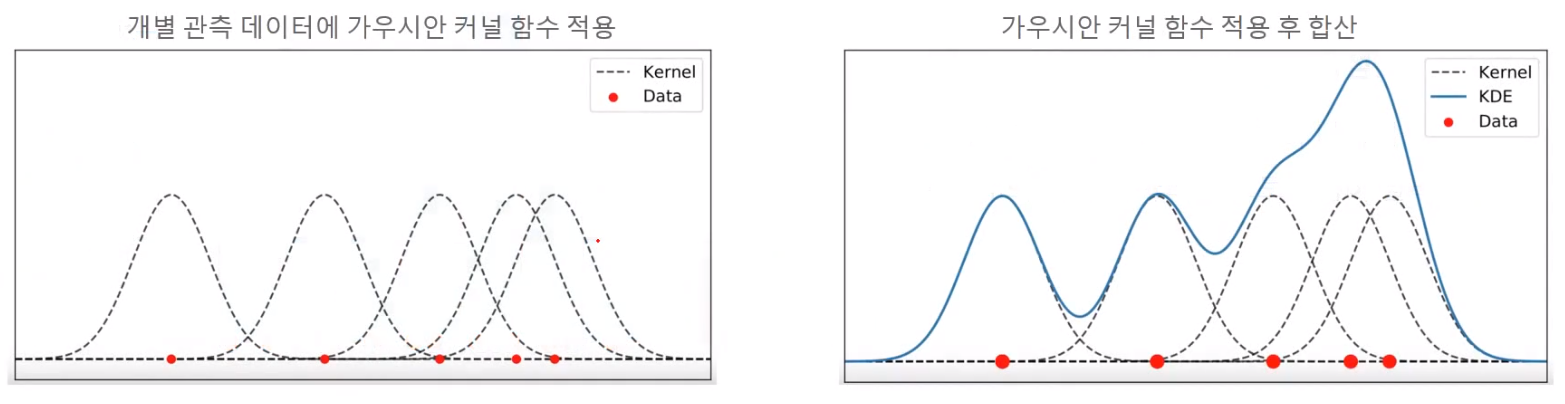


  

- 대역폭 $h$는 KDE 형태를 부드러운 형태로 평활화(Smoothing)하는 데 적용되며, 이 $h$를 어떻게 설정하느냐에 따라 확률 밀도 추정 성능을 크게 좌우할 수 있음!
  - 작은 $h$값($h = 1.0$)은 좁고 뾰족한 KDE를 가지게 됨 ⇒ 변동성이 큰 방식으로 확률 밀도 함수를 추정하므로 과적합(over-fitting)하기 쉬움
  - 큰 $h$값($h = 10$)은 과도하게 평활화(smoothing)된 KDE로 인해 지나치게 단순화된 방식으로 확률 밀도 함수를 추정 ⇒ 과소적합(under-fitting)하기 쉬움
  - 적절한 KDE의 대역폭 $h$를 계산하는 것은 KDE 기반의 평균 이동(Mean Shift) 군집화에서 매우 중요

- 평균 이동 군집화는 **대역폭이 클수록** 평활화된 KDE로 인해 **적은 수**의 군집 중심점을 가지며, **대역폭이 적을수록** **많은 수**의 군집 중심점을 가짐
- 평균 이동 군집화는 군집의 개수를 지정하지 않으며, 오직 대역폭의 크기에 따라 군집화를 수행

- make_blobs()를 이용한 예제

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3,
                  cluster_std=0.7, random_state=0)

meanshift= MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


- bandwidth를 살짝 높이면?

In [ ]:
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


- 사이킷런은 최적화된 bandwidth 값을 찾기 위해서 estimate_bandwidth() 함수를 제공함

In [ ]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.816


- make_blobs() 데이터 세트에 위에서 구한 bandwidth를 사용해 군집화 수행

In [ ]:
import pandas as pd


clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


- 구성된 3개의 군집을 시각화

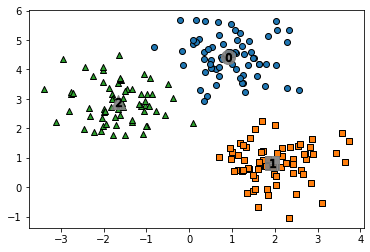

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label] )

    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)

plt.show()

- target 값과 군집 label 값을 비교

In [ ]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


- 평균 이동의 장점
  - 데이터 세트의 형태를 특정 형태로 가정 X & 특정 분포도 기반의 모델로 가정 X ⇒ 좀 더 유연한 군집화 가능
  - 이상치의 영향력도 크지 않음
  - 미리 군집의 개수를 정할 필요 X

- 평균 이동의 단점
  - 알고리즘의 수행 시간이 오래 걸림
  - bandwidth의 크기에 따른 군집화 영향도가 매우 큼

- 일반적으로 평균 이동 군집화 기법은 컴퓨터 비전 영역에서 더 많이 사용!

# **04.** GMM(Gaussian Mixture Model)

**GMM(Gaussian Mixture Model) 소개**

- GMM 군집화 : 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포(Gaussian Distribution)를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행
- 가우시안 분포 : 정규 분포(Normal distribution), 좌우 대칭형의 종(Bell) 형태를 가진 통계학에서 가장 잘 알려진 연속 확률 함수
- GMM 군집화 방식 : 데이터를 구성하는 여러 개의 정규 분포 곡선을 추출하고, 개별 데이터가 이 중 어떤 정규 분포에 속하는지 결정하는 방식  
  ⇒ 모수 추정
    - 개별 정규 분포의 평균과 분산
    - 각 데이터가 어떤 정규 분포에 해당되는지의 확률
- 모수 추정을 위해 EM(Expectation and Maximization) 방법을 적용



---



**GMM을 이용한 붓꽃 데이터 세트 군집화**

- 붓꽃 데이터 세트 로딩

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

- GMM 군집화 수행

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 클러스터링 결과를 irisDF 의 'gmm_cluster' 컬럼명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라서 gmm_cluster 값이 어떻게 매핑되었는지 확인.
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


- 비교를 위해 K-평균 군집화 수행

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


- 붓꽃 데이터 세트는 GMM 군집화에 더 효과적임
- K-평균은 평균 거리 중심으로 중심을 이동하면서 군집화를 수행 ⇒ 개별 군집 내의 데이터가 **원형**으로 흩어져 있는 경우에 매우 효과적으로 군집화가 수행



---



**GMM과 K-평균의 비교**

- 군집을 시각화하는 함수

In [ ]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

- 데이터가 길쭉한 타원형으로 늘어선 경우에 KMeans는 군집화를 잘 수행하지 못함

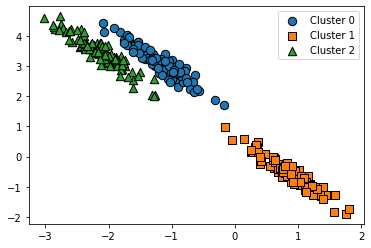

In [ ]:
from sklearn.datasets import make_blobs

# make_blobs() 로 300개의 데이터 셋, 3개의 cluster 셋, cluster_std=0.5 을 만듬.
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환함.
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
# feature 데이터 셋과 make_blobs( ) 의 y 결과 값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
# 생성된 데이터 셋을 target 별로 다른 marker 로 표시하여 시각화 함.
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

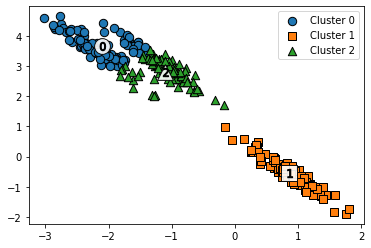

In [ ]:
# 3개의 Cluster 기반 Kmeans 를 X_aniso 데이터 셋에 적용
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label',iscenter=True)

- 이 타원형 데이터를 GMM으로 수행

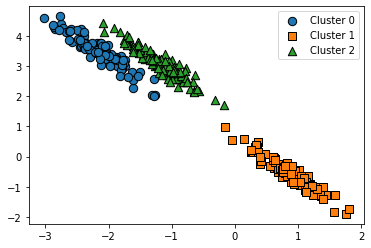

In [ ]:
# 3개의 n_components기반 GMM을 X_aniso 데이터 셋에 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정.
visualize_cluster_plot(gmm, clusterDF, 'gmm_label',iscenter=False)

- GMM은 K-평균과 다른게 군집의 중심 좌표를 구할 수 없기 때문에, 군집 중심 표현 X

- 군집화 효율 차이 확인

In [ ]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


- GMM은 KMeans보다 유연하게 다양한 데이터 세트에 잘 적용! But, 군집화를 위한 수행 시간이 오래 걸림

# **05.** DBSCAN

**DBSCAN 개요**

- DBSCAN(Density Based Spatial Clustering of Applications with Noise) : 밀도 기반 군집화의 대표적인 알고리즘
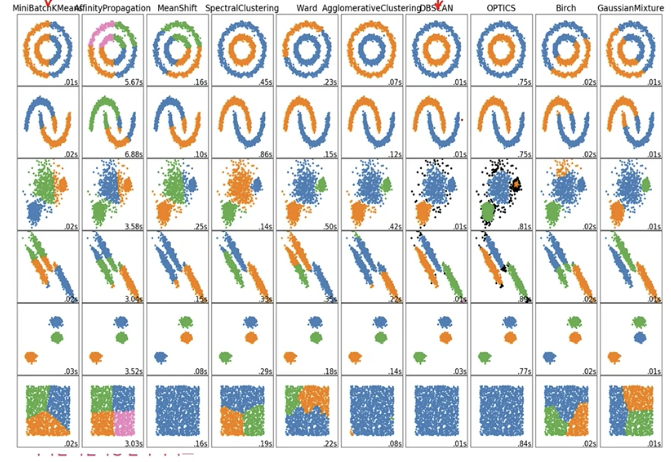
- DBSCAN은 특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 하고 있어서, 복잡한 기하학적 분포도를 가진 데이터 세트에 대해서도 군집화 잘 수행 !

- DBSCAN 중요한 파라미터 2가지
  - 입실론 주변 영역(epsilon) : 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
  - 최소 데이터 개수(min points) : 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수

- 입실론 주변 영역 내에 포함되는 최소 데이터 개수를 충족시키는가 아닌가에 따라 데이터 포인트 정의
  - 핵심 포인트(Core Point) : 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우의 해당 데이터
  - 이웃 포인트(Neighbor Point) : 주변 영역 내에 위치한 타 데이터
  - 경계 포인트(Border Point) : 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터
  - 잡음 포인트(Noise Point) : 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터

- DBSCAN 군집화 적용 방법(그림을 통해)
  1. 특정 입실론 반경 내에 포함될 최소 데이터 세트를 6개로(자기 자신의 데이터를 포함) 가정
  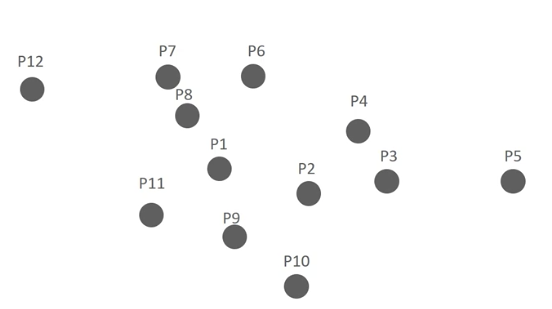
  2. P1 데이터를 기준으로 입실론 반경 내에 포함된 데이터가 7개로 최소 데이터 5개 이상을 만족하므로 P1 데이터는 핵심 포인트(Core Point)이다.
  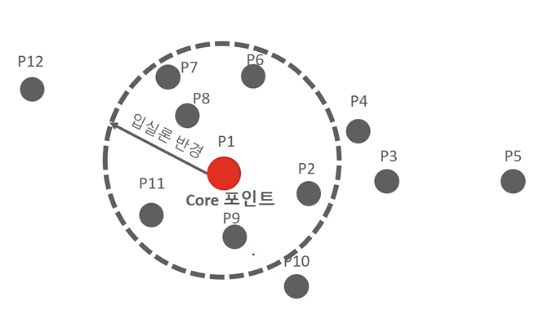
  3. 다음으로 P2 데이터 포인트를 살펴보면, P2 역시 반경 내에 6개의 데이터를 가지고 있으므로 핵심포인트이다.
  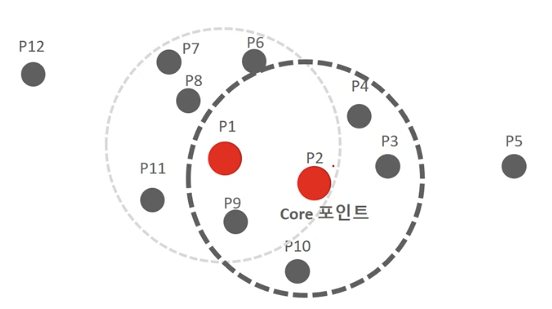
  4. 핵심 포인트 P1의 이웃 데이터 포인트 P2 역시 핵심 포인트일 경우, P1에서 P2로 연결해 직접 접근이 가능하다.
  5. 특정 핵심 포인트에서 직접 접근이 가능한 다른 핵심 포인트를 서로 연결하면서 군집화를 구성한다. 이러한 방식으로 점차적으로 군집(Cluster)영역을 확장해 나가는 것이 DBSCAN 군집화 방식이다.
  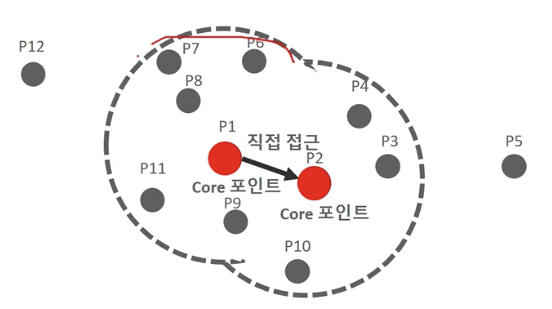
  6. P3 데이터의 경우 반경 내에 포함되는 이웃 데이터는 P2, P4로 2개이므로 군집으로 구분할 수 있는 핵심포인트가 될 수 없다. 하지만 이웃 데이터 중에 핵심 포인트인 P2를 가지고 있으므로, 경계 포인트(Border Point)가 되고, 경계포인트는 군집의 외곽을 형성한다.
  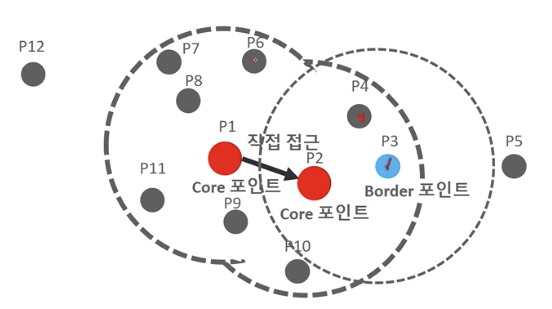
  
  7. 다음 그림의 P5와 같이 반경 내에 최소 데이터를 가지고 있지도 않고, 핵심 포인트 또한 이웃 데이터로 가지고 있지 않는 데이터를 잡음 포인트(Noise Point)라고 한다.

  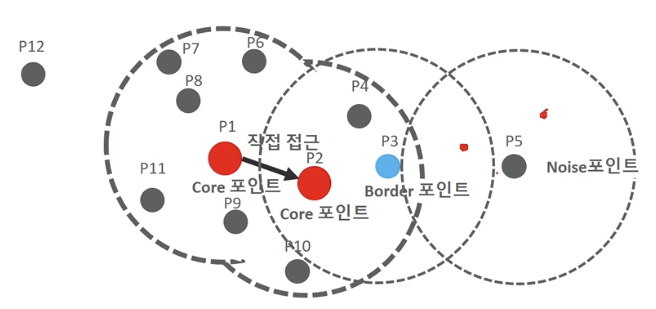



---



**DBSCAN 적용하기 - 붓꽃 데이터 세트**

- 붓꽃 데이터 세트 로드

In [ ]:
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

- DBSCAN 클래스를 이용해 붓꽃 데이터 세트 군집화

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


- dbscan_cluster 값에 **-1**이 군집 레이블로 있는 것 = **노이즈**에 속하는 군집  
⇒ DBSCAN에서 0과 1 두 개의 군집으로 군집화됨

- DBSCAN은 군집의 개수를 알고리즘에 따라 자동으로 지정하므로, DBSCAN에서 군집의 개수를 지정하는 것은 무의미함

- DBSCAN으로 군집화 데이터 세트를 2차원 평면에서 표현하기 위해 PCA를 이용해 2개의 피처로 압축 변환한 뒤, 시각화

In [ ]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

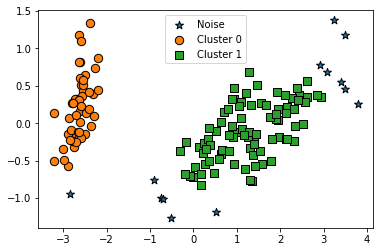

In [ ]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

- DBSCAN 알고리즘에 적절한 eps와 min_samples 파라미터를 통해 최적의 군집을 찾는 게 중요!
- eps의 값을 크게 하면 반경이 커져 포함하는 데이터가 많아지므로, 노이즈 데이터 개수가 작아짐

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


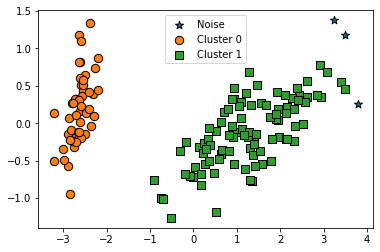

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

- min_samples를 크게 하면 주어진 반경 내에서 더 많은 데이터를 포함시켜야 하므로, 노이즈 데이터 개수가 커짐

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


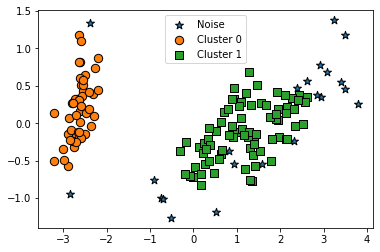

In [ ]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)



---



**DBSCAN 적용하기 - make_circles() 데이터 세트**

- make_circles() 함수를 이용해 내부 원과 외부 원 형태로 돼 있는 2차원 데이터 세트를 만듦
- make_circles() 함수는 오직 2개의 피처만을 생성하므로 별도의 피처 개수를 지정할 필요 X
- 파라미터 noise는 노이즈 데이터 세트의 비율, factor는 외부 원과 내부 원의 scale 비율

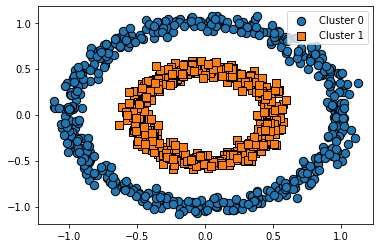

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

- K-평균 군집화 수행

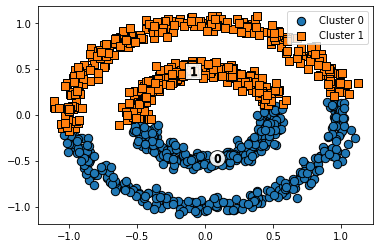

In [ ]:
# KMeans로 make_circles( ) 데이터 셋을 클러스터링 수행.
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

- GMM 군집화 수행

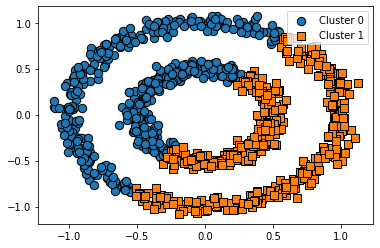

In [ ]:
# GMM으로 make_circles( ) 데이터 셋을 클러스터링 수행.
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

- DBSCAN 군집화 수행

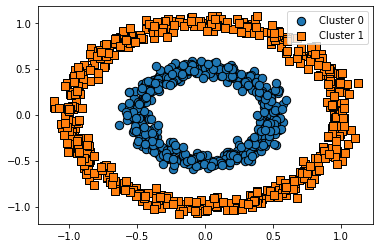

In [ ]:
# DBSCAN으로 make_circles( ) 데이터 셋을 클러스터링 수행.
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

# **06.** 군집화 실습 - 고객 세그먼테이션

**데이터 세트 로딩과 데이터 클렌징**

- http://archive.ics.uci.edu/ml/datasets/online+retail

In [ ]:
# 구글 코랩 <-> 구글 드라이브 연동
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/SAI - A/파이썬 머신러닝 완벽 가이드/Online Retail.xlsx')
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


- 데이터 세트 칼럼
  - InvoiceNo : 주문번호 ('C'로 시작하는 것은 취소 주문)
  - StockCode : 제품 코드(Item Code)
  - Description : 제품 설명
  - Quantity : 주문 제품 건수
  - InvoiceDate : 주문 일자
  - UnitPrice : 제품 단가
  - CustomerID : 고객 번호
  - Country : 국가명(주문 고객의 국적)

- 데이터 세트의 전체 건수, 칼럼 타입, Null 개수 확인

In [ ]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


- Null 데이터 제거 : 특히 CustomerID가 Null인 데이터가 많음
- 오류 데이터 삭제 : 대표적인 오류 데이터는 Quantity 또는 UnitPrice가 0보다 작은 경우

In [ ]:
retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df = retail_df[retail_df['UnitPrice'] > 0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]
print(retail_df.shape)
retail_df.isnull().sum()

(397884, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

- 주요 주문 고객의 국가 확인 후 정제 : 영국이 대다수를 차지하므로 다른 국가의 데이터는 모두 삭제

In [ ]:
retail_df['Country'].value_counts()[:5]

United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Name: Country, dtype: int64

In [ ]:
retail_df = retail_df[retail_df['Country']=='United Kingdom']
print(retail_df.shape)

(354321, 8)




---


**RFM 기반 데이터 가공**

- 주문 금액 데이터 새로 만들기 : UnitPrice * Quantity
- CustomerNo도 float형을 int형으로

In [ ]:
retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

- Top 5 주문 건수와 주문 금액을 가진 고객 데이터를 추출해보기

In [ ]:
print(retail_df['CustomerID'].value_counts().head(5))
print(retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)[:5])

17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: CustomerID, dtype: int64
CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


- 위의 결과에서 볼 수 있듯이 몇몇 특정 고객이 많은 주문 건수와 주문 금액을 가지고 있음
- 이 데이터 세트는 주문번호(InvoiceNo) + 상품코드(StockCode) 를 Group by를 수행하면 거의 1에 가깝게 유일한 식별자 레벨이 됨

In [ ]:
retail_df.groupby(['InvoiceNo','StockCode'])['InvoiceNo'].count().mean()

1.028702077315023

- 지금 수행하려는 RFM 기반의 고객 세그먼테이션은 고객 레벨로 주문 기간, 주문 횟수, 주문 금액 데이터를 기반으로 해 세그먼테이션을 수행하는 것
- 이에 주문번호 + 상품코드 기준의 데이터를 고객 기준의 Recency, Frequency, Monetary value 데이터로 변경하기
- 주문번호 기준의 retail_df DataFrame에 groupby('CustomerID')를 적용해 CustomerID 기분으로 Datarame을 새롭게 생성하기

In [ ]:
# DataFrame의 groupby() 의 multiple 연산을 위해 agg() 이용
# Recency는 InvoiceDate 컬럼의 max() 에서 데이터 가공
# Frequency는 InvoiceNo 컬럼의 count() , Monetary value는 sale_amount 컬럼의 sum()
aggregations = {
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'sale_amount':'sum'
}
cust_df = retail_df.groupby('CustomerID').agg(aggregations)
# groupby된 결과 컬럼값을 Recency, Frequency, Monetary로 변경
cust_df = cust_df.rename(columns = {'InvoiceDate':'Recency',
                                    'InvoiceNo':'Frequency',
                                    'sale_amount':'Monetary'
                                   }
                        )
cust_df = cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


- Recency 칼럼은 개별 고객당 가장 최근의 주문인데, 이 데이터가 2010년 12월 1일에서 2011년 12월 9일까지의 데이터이므로, 데이터 상 오늘의 날짜인 2011년 12월 10일을 현재 날짜로 간주하고 가장 최근의 주문 일자를 뺀 데이터에서 일자 데이터(days)만 추출해 생성

In [ ]:
import datetime as dt

cust_df['Recency'] = dt.datetime(2011,12,10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
print('cust_df 로우와 컬럼 건수는 ',cust_df.shape)
cust_df.head(3)

cust_df 로우와 컬럼 건수는  (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73




---



**RFM 기반 고객 세그먼테이션**

- 데이터의 칼럼별 히스토그램을 확인하고, 왜곡된 데이터 분포도에서 군집화를 수행할 때 어떤 현상이 발생하는지 알아보기

(array([3.887e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.75000000e+00, 2.59691050e+04, 5.19344600e+04, 7.78998150e+04,
        1.03865170e+05, 1.29830525e+05, 1.55795880e+05, 1.81761235e+05,
        2.07726590e+05, 2.33691945e+05, 2.59657300e+05]),
 <a list of 10 Patch objects>)

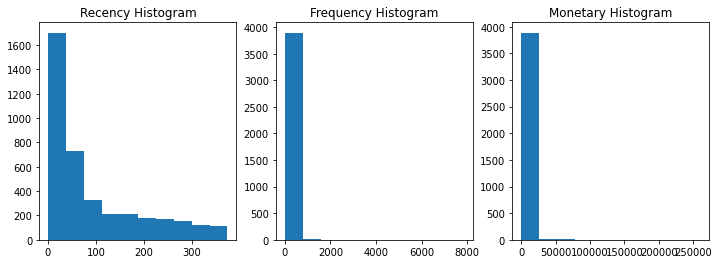

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])

- 모두 왜곡된 데이터 값 분포도를 가지고 있음
- 각 칼럼의 데이터 값 백분위로 대략적으로 어떻게 값이 분포돼 있는지 확인

In [ ]:
cust_df[['Recency','Frequency','Monetary']].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


- 위의 결과를 보면
  - Recency
    - 평균이 92.7 > 50%(중위값)인 51
    - max값이 374 > 75%(3/4분위)인 143
  - Frequency
    - 평균이 90.3인데 75%인 99.25에 가까움
  - Monetary
    - 평균이 1864.3 > 75%인 1576.5


- 왜곡 정도가 매우 높은 데이터 세트에 K-평균 군집을 적용하면, 변별력이 떨어지는 군집화가 수행됨
- 데이터 세트를 StandardScaler로 평균과 표준편차를 재조정해보기
- 그 후에 K-평균 수행

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[['Recency','Frequency','Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

실루엣 스코어는 : 0.592


- 군집화 구성 시각화

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화
def visualize_kmeans_plot_multi(cluster_lists, X_features):

    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np

    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])

     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels

        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']

        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))
        axs[ind].legend(loc='upper right')

    plt.show()

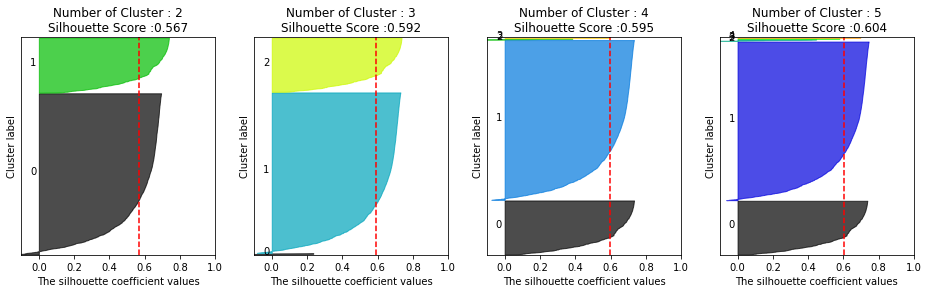

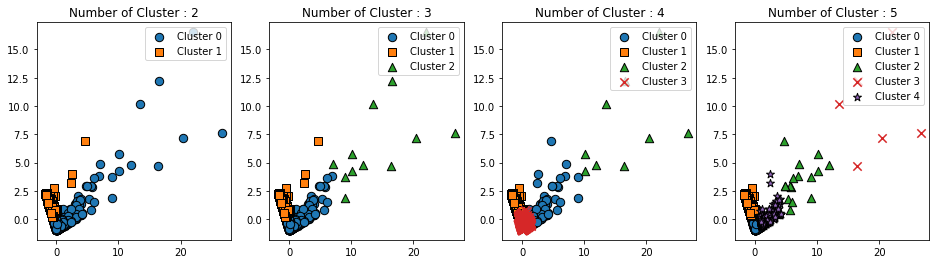

In [ ]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

- 이처럼 지나치게 왜곡된 데이터 세트는 K-평균과 같은 거리 기반 군집화 알고리즘에서 지나치게 일반적인 군집화 결과를 도출하게 됨

- 데이터 세트의 왜곡 정도를 낮추기 위해 가장 자주 사용되는 방법은 데이터 값에 로그(log)를 적용하는 로그 변환

In [ ]:
### Log 변환을 통해 데이터 변환
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Recency, Frequecny, Monetary 컬럼에 np.log1p() 로 Log Transformation
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
X_features = cust_df[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

실루엣 스코어는 : 0.303


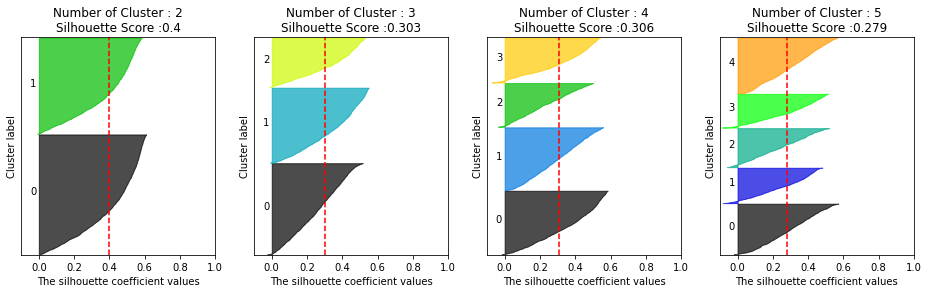

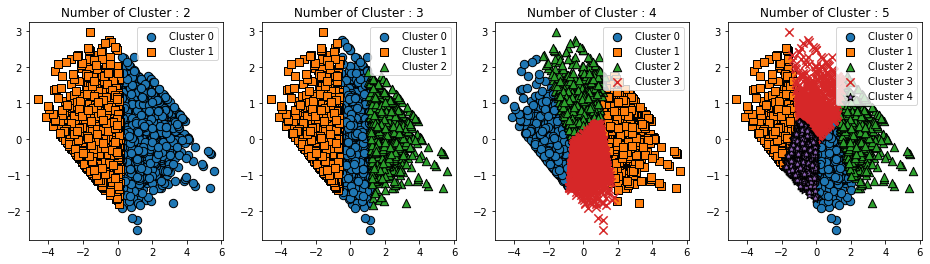

In [ ]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

- 실루엣 스코어는 로그 변환하기 전보다 떨어지지만, 앞의 경우보다 더 균일하게 군집화가 구성됐음
- 왜곡된 데이터 세트에 대해서는 로그 변환으로 데이터를 일차 변환한 후에 군집화를 수행하면 더 나은 결과를 도출할 수 있음